## REGRESSION

TIPOS DE PROBLEMAS DE REGRESIÓN


- Regresión Lineal
    - Modela la relación entre una o más variables dependientes (predictores) y una dependiente mediante una relación lineal.

- Regresión no lineal
     - Modela la relación entre una o más variables dependientes (predictores) y una dependiente mediante una relación lineal.

- Regresión con múltiples salidas
    - Hay más de una variable dependiente.
    
    
En los problemas de regresión, la variable de salida es continua (ej: precio de una casa)



METRICAS

<img src='images/metrics.png' WIDTH=80%>






RECOMENDACIONES

<img src="images/recomendaciones.png">



## Regresión Lineal


### DATA PRE-PROCESSING







In [2]:
!ls data


Salary_dataset.csv


In [7]:


import pandas as pd


df = pd.read_csv('data/Salary_dataset.csv')


df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:

# elimino unnamed, que no se lo que es
df.drop('Unnamed: 0',axis=1,inplace=True)

df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [9]:

df.isna().sum()



YearsExperience    0
Salary             0
dtype: int64

no hay datos faltantes

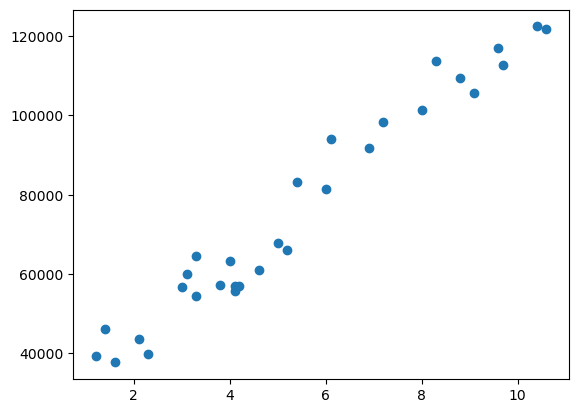

In [11]:
import matplotlib.pyplot as plt


plt.scatter(df['YearsExperience'],df['Salary'])

puede apreciarse una relación más bien lineal

In [13]:
# normalizo (puede tener algún beneficio, a pesar de tener una sola característica)

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["YearsExperience"]),
)

# Create X & y
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
# le "pasa piques", en todo lo que es normalización los params (ej  muy sigma de una ormal)
#los obtengo con los datos de train
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
X_train_normal

array([[0.9787234 ],
       [0.80851064],
       [0.30851064],
       [0.        ],
       [0.11702128],
       [0.42553191],
       [0.19148936],
       [0.31914894],
       [0.30851064],
       [0.72340426],
       [0.0212766 ],
       [0.04255319],
       [0.84042553],
       [0.09574468],
       [0.63829787],
       [0.89361702],
       [0.5106383 ],
       [1.        ],
       [0.60638298],
       [0.22340426],
       [0.29787234],
       [0.36170213],
       [0.5212766 ],
       [0.20212766]])

In [15]:
# construyamos nuestro modelo

In [19]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2023-11-15 15:46:53.945150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:46:54.414346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:46:54.416636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 15:46:55.995670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
X_train_normal.shape

(24, 1)

In [48]:


# cómo es un problema bastante lineal, no me sirve poner no linealidades
# como las activaciones de las relu



def build_model():
  model = keras.Sequential([
    layers.Dense(200,input_shape=[X_train_normal.shape[1]]),
    layers.Dense(200),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(100),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [49]:
model = build_model()

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               400       
                                                                 
 dense_17 (Dense)            (None, 200)               40200     
                                                                 
 dense_18 (Dense)            (None, 150)               30150     
                                                                 
 dense_19 (Dense)            (None, 100)               15100     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 85,951
Trainable params: 85,951
Non-trainable params: 0
_________________________________________________________________


In [51]:
"""

validation_split: Indica la fracción de datos que se debe utilizar como conjunto de validación.
En este caso, el 20% de los datos se utilizarán como conjunto de validación, 
y el 80% restante se utilizará como conjunto de entrenamiento. Esto puede ayudar a monitorear 
el rendimiento del modelo en un conjunto de datos que no se utiliza para entrenamiento, 
lo que puede ayudar a detectar problemas como sobreajuste.


los de test son para test!!!

"""


history = model.fit(
        X_train_normal,y_train,
        validation_split = 0.2,
        epochs=100,
        
)



Epoch 1/100


/home/marcos/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 1s 625ms/step - loss: 6703711744.0000 - mae: 76217.7266 - mse: 6703711744.0000 - val_loss: 4627617792.0000 - val_mae: 66572.8750 - val_mse: 4627617792.0000
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 6703487488.0000 - mae: 76216.5391 - mse: 6703487488.0000 - val_loss: 4627425280.0000 - val_mae: 66571.4922 - val_mse: 4627425280.0000
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 6703150080.0000 - mae: 76214.7266 - mse: 6703150080.0000 - val_loss: 4627084288.0000 - val_mae: 66569.0469 - val_mse: 4627084288.0000
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 6702561792.0000 - mae: 76211.5234 - mse: 6702561792.0000 - val_loss: 4626510336.0000 - val_mae: 66564.9219 - val_mse: 4626510336.0000
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 6701587968.0000 - mae: 76206.2109 - mse: 6701587968.0000 - val_loss: 4625611776.0000 - val_mae: 66558.4297 - val_ms

Epoch 41/100
1/1 [==============================] - 0s 26ms/step - loss: 5378700800.0000 - mae: 68117.8828 - mse: 5378700800.0000 - val_loss: 3666027264.0000 - val_mae: 59120.9297 - val_mse: 3666027264.0000
Epoch 42/100
1/1 [==============================] - 0s 27ms/step - loss: 5282150912.0000 - mae: 67485.5078 - mse: 5282150912.0000 - val_loss: 3596823808.0000 - val_mae: 58547.2500 - val_mse: 3596823808.0000
Epoch 43/100
1/1 [==============================] - 0s 27ms/step - loss: 5181623296.0000 - mae: 66820.5391 - mse: 5181623296.0000 - val_loss: 3524832000.0000 - val_mae: 57944.4062 - val_mse: 3524832000.0000
Epoch 44/100
1/1 [==============================] - 0s 25ms/step - loss: 5077146624.0000 - mae: 66122.2266 - mse: 5077146624.0000 - val_loss: 3450082048.0000 - val_mae: 57311.7500 - val_mse: 3450082048.0000
Epoch 45/100
1/1 [==============================] - 0s 44ms/step - loss: 4968767488.0000 - mae: 65389.7969 - mse: 4968767488.0000 - val_loss: 3372614400.0000 - val_mae: 566

Epoch 81/100
1/1 [==============================] - 0s 27ms/step - loss: 409921984.0000 - mae: 16333.3799 - mse: 409921984.0000 - val_loss: 244589312.0000 - val_mae: 13098.3711 - val_mse: 244589312.0000
Epoch 82/100
1/1 [==============================] - 0s 26ms/step - loss: 349612000.0000 - mae: 14833.8945 - mse: 349612000.0000 - val_loss: 208536928.0000 - val_mae: 11724.4277 - val_mse: 208536928.0000
Epoch 83/100
1/1 [==============================] - 0s 26ms/step - loss: 296397024.0000 - mae: 13475.4492 - mse: 296397024.0000 - val_loss: 177331152.0000 - val_mae: 10396.7578 - val_mse: 177331152.0000
Epoch 84/100
1/1 [==============================] - 0s 26ms/step - loss: 250063904.0000 - mae: 12166.0107 - mse: 250063904.0000 - val_loss: 150746032.0000 - val_mae: 9122.9355 - val_mse: 150746032.0000
Epoch 85/100
1/1 [==============================] - 0s 28ms/step - loss: 210308192.0000 - mae: 11053.3516 - mse: 210308192.0000 - val_loss: 128492056.0000 - val_mae: 7931.5298 - val_mse: 12

Text(0.5, 0, 'epochs')

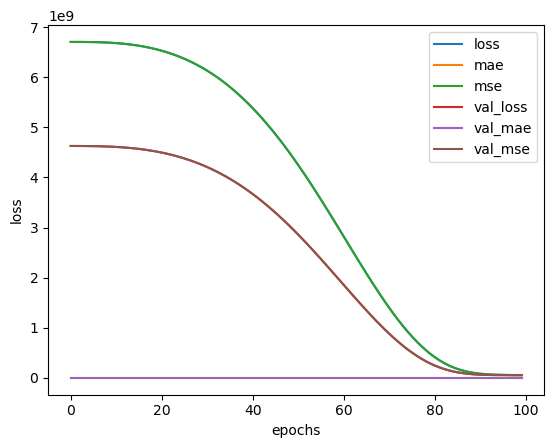

In [52]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [54]:

model.evaluate(X_test_normal,y_test)


1/1 [==============================] - 0s 19ms/step - loss: 65590064.0000 - mae: 7060.5347 - mse: 65590064.0000


[65590064.0, 7060.53466796875, 65590064.0]

para saber si mi mse es bueno voy a comparalo con el rango de los datos

In [58]:
descriptivas = df.describe()
rango = descriptivas.loc[['min', 'max']]

rango



,YearsExperience,Salary
min,1.2,37732.0
max,10.6,122392.0


In [64]:
max_value = 122392.0
min_value = 37732.0

mse = 65590064


X.shape


#mse rel -> 774


774/min_value

# min -> 100
# 774    x




0.020513092335418214

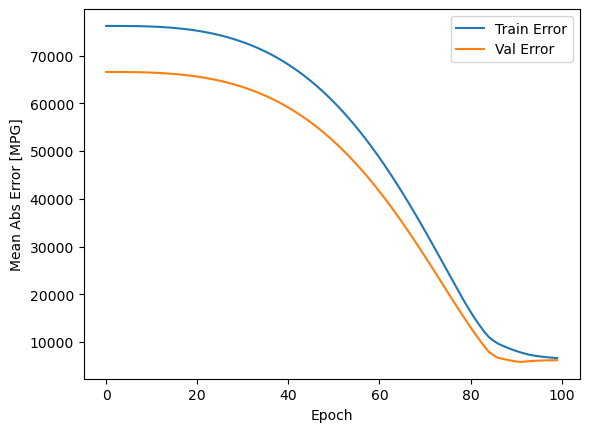

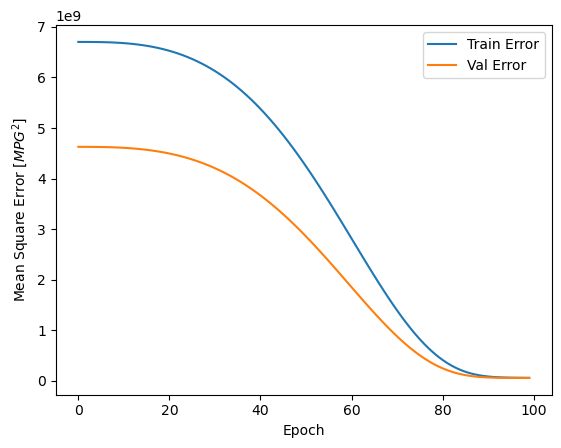

In [57]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)
